## Prerequisites

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

import geopandas as gpd
import regex as re
import dash
from dash import html,dcc, Dash

### Importing review dataset and countrycode dataset

In [3]:
reviews = pd.read_csv('data/Hotel_Reviews.csv')
cc = pd.read_csv('data/iso_country.csv')

## Cleaning the tables

In [3]:
reviews.Reviewer_Nationality = reviews.Reviewer_Nationality.str.strip()

In [4]:
reviews.loc[reviews.Reviewer_Nationality == 'Abkhazia Georgia','Reviewer_Nationality'] = 'Georgia'
reviews.loc[reviews.Reviewer_Nationality == 'Isle of Man','Reviewer_Nationality'] = 'United Kingdom'
reviews.loc[reviews.Reviewer_Nationality == 'United States Minor Outlying Islands','Reviewer_Nationality'] = 'United States of America'
reviews.loc[reviews.Reviewer_Nationality == 'U S Virgin Islands','Reviewer_Nationality'] = 'United States of America'
reviews.loc[reviews.Reviewer_Nationality == 'South Sudan','Reviewer_Nationality'] = 'Sudan'
reviews.loc[reviews.Reviewer_Nationality == 'French Guana','Reviewer_Nationality'] = 'French Guiana'
reviews.loc[reviews.Reviewer_Nationality == 'Crimea','Reviewer_Nationality'] = 'Ukraine'


In [5]:
cc.rename(columns={'English short name lower case':'Reviewer_Nationality'},inplace=True)
cc.loc[cc['Reviewer_Nationality'] == 'United States','Reviewer_Nationality'] = 'United States of America'

In [6]:
asn = reviews.copy()
asn = asn.groupby('Reviewer_Nationality')['Reviewer_Score'].agg(['size','mean'])
asn.reset_index(inplace=True)

In [7]:
asn.drop(0,axis=0,inplace=True) ## Dropping all reviews without nationality

In [8]:
asn = asn.loc[asn['size'] >= 3]

In [9]:
asn.rename(columns={'mean':'Reviewer_Score'},inplace=True)

In [10]:
asn = asn.set_index('Reviewer_Nationality').join(cc.set_index('Reviewer_Nationality'))
asn.reset_index(inplace=True)

In [11]:
asn = asn.round({'Reviewer_Score':2})

In [12]:
asn.drop(['Alpha-2 code','Numeric code','ISO 3166-2'],axis=1,inplace=True)

In [13]:
asn.loc[asn['Reviewer_Nationality'] == 'United States of America','Alpha-3 code'] = 'USA'
asn.loc[asn['Reviewer_Nationality'] == 'Syria','Alpha-3 code'] = 'SYR'
asn.loc[asn['Reviewer_Nationality'] == 'Antigua Barbuda','Alpha-3 code'] = 'ATG'
asn.loc[asn['Reviewer_Nationality'] == 'British Virgin Islands','Alpha-3 code'] = 'VGB'
asn.loc[asn['Reviewer_Nationality'] == 'Brunei','Alpha-3 code'] = 'BRN'
asn.loc[asn['Reviewer_Nationality'] == 'Central Africa Republic','Alpha-3 code'] = 'CAF'
asn.loc[asn['Reviewer_Nationality'] == 'Cocos K I','Alpha-3 code'] = 'CCK'
asn.loc[asn['Reviewer_Nationality'] == 'Democratic Republic of the Congo','Alpha-3 code'] = 'COG'
asn.loc[asn['Reviewer_Nationality'] == 'Congo','Alpha-3 code'] = 'COD'
asn.loc[asn['Reviewer_Nationality'] == 'East Timor','Alpha-3 code'] = 'TLS'
asn.loc[asn['Reviewer_Nationality'] == 'Falkland Islands Malvinas','Alpha-3 code'] = 'FLK'
asn.loc[asn['Reviewer_Nationality'] == 'Hong Kong','Alpha-3 code'] = 'HKG'
asn.loc[asn['Reviewer_Nationality'] == 'Laos','Alpha-3 code'] = 'LAO'
asn.loc[asn['Reviewer_Nationality'] == 'Libya','Alpha-3 code'] = 'LBY'
asn.loc[asn['Reviewer_Nationality'] == 'Macau','Alpha-3 code'] = 'MAC'
asn.loc[asn['Reviewer_Nationality'] == 'Macedonia','Alpha-3 code'] = 'MKD'
asn.loc[asn['Reviewer_Nationality'] == 'Moldova','Alpha-3 code'] = 'MDA'
asn.loc[asn['Reviewer_Nationality'] == 'Palestinian Territory','Alpha-3 code'] = 'PSE'
asn.loc[asn['Reviewer_Nationality'] == 'Saint Barts','Alpha-3 code'] = 'BLM'
asn.loc[asn['Reviewer_Nationality'] == 'Saint Vincent Grenadines','Alpha-3 code'] = 'VCT'
asn.loc[asn['Reviewer_Nationality'] == 'St Maarten','Alpha-3 code'] = 'MAF'
asn.loc[asn['Reviewer_Nationality'] == 'St Pierre and Miquelon','Alpha-3 code'] = 'SPM'
asn.loc[asn['Reviewer_Nationality'] == 'Svalbard Jan Mayen','Alpha-3 code'] = 'SJM'
asn.loc[asn['Reviewer_Nationality'] == 'Turks Caicos Islands','Alpha-3 code'] = 'TCA'
asn.loc[asn['Reviewer_Nationality'] == 'Vatican City','Alpha-3 code'] = 'VAT'


## Create Average awarded score per reviewer nation table

## Visualizing Score Awarded by country

In [14]:
fig = go.Figure(data=go.Choropleth(
    locations = asn['Alpha-3 code'],
    z = asn['Reviewer_Score'],
    text = asn['Reviewer_Nationality'],
    autocolorscale=False,
    marker_line_color='darkgray',
    marker_line_width=1,
    colorscale='RdYlGn',
    colorbar_title = 'Reviewscore'))
fig.update_layout(
    margin=dict(l=2, r=2, t=50, b=50),
    title_text='Average score awarded by country',
    annotations= [dict(x=0.5,y=-0.1,text="Source: <a href='https://www.kaggle.com/datasets/jiashenliu/515k-hotel-reviews-data-in-europe'> 515K Hotel Reviews Data in Europe (booking.com)",showarrow=False)],
    geo=dict(
        showframe=False,
        showland=True,
        showcoastlines=False,
        projection_type='equirectangular' # 'orthographic' will make it globeeee
        
    ))

## Creating dataset of highest and lowest reviewed country

In [15]:
lowhigh = [asn.loc[asn['Reviewer_Score'].idxmax()].to_frame().T,asn.loc[asn['Reviewer_Score'].idxmin()].to_frame().T]

In [16]:
lowhighdf = pd.concat(lowhigh)
lowhighdf.drop(['size','Alpha-3 code'],axis=1,inplace=True)
lowhighdf.reset_index(inplace=True,drop=True)

In [17]:
lowhighdf['Reviewer_Score'] = lowhighdf['Reviewer_Score'].astype('float')

In [18]:
lowhighdf

,Reviewer_Nationality,Reviewer_Score
0,Tajikistan,9.36
1,Mali,6.44


In [19]:
plt.style.use('ggplot')

In [20]:
sns.set_palette('pastel')

In [21]:
sns.color_palette()

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [22]:
print(sns.color_palette().as_hex())

['#a1c9f4', '#ffb482', '#8de5a1', '#ff9f9b', '#d0bbff', '#debb9b', '#fab0e4', '#cfcfcf', '#fffea3', '#b9f2f0']


In [23]:
lowhighdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Reviewer_Nationality  2 non-null      object 
 1   Reviewer_Score        2 non-null      float64
dtypes: float64(1), object(1)
memory usage: 160.0+ bytes


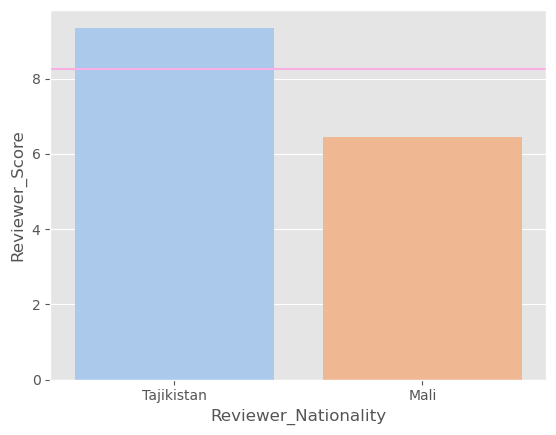

In [24]:
ax = sns.barplot(data=lowhighdf,x='Reviewer_Nationality',y='Reviewer_Score',palette='pastel')
ax.axhline(asn.Reviewer_Score.mean(),color='#fab0e4')
plt.show()

## Highest variance in reviews (Which country rates a certain country worse/better than average)

In [25]:
tempdf = reviews.groupby(['Reviewer_Nationality','Country_Name'])['Reviewer_Score'].size().to_frame().drop("",axis=0).reset_index()
sizegroup = pd.DataFrame(tempdf['Reviewer_Score'])
sizegroup.rename(columns={'Reviewer_Score':'Size'},inplace=True)
asnp = reviews.groupby(['Reviewer_Nationality','Country_Name'])['Reviewer_Score'].mean().to_frame().drop("",axis=0).reset_index()
averagescore=asnp.groupby('Country_Name')['Reviewer_Score'].mean().to_frame()
averagescore.rename(columns={'Reviewer_Score':'Average for destination'},inplace=True)
diffdf = pd.merge(asnp,averagescore,how='left',on='Country_Name')
diffdf['diff'] = np.nan
diffdf['diff'] = diffdf[['Average for destination','Reviewer_Score','diff']].diff(axis=1).shift(axis=1)['diff']
diffdf.rename(columns={'Reviewer_Score':'Awarded score'},inplace=True)
diffdf = diffdf.join(sizegroup)

winner=diffdf.loc[diffdf.loc[diffdf['Size'] > 10]['diff'].idxmin()].to_frame().T
loser=diffdf.loc[diffdf.loc[diffdf['Size'] > 10]['diff'].idxmax()].to_frame().T
top = pd.concat([winner,loser])

In [26]:
top2 = top[['Reviewer_Nationality','Country_Name','diff']]

In [27]:
top2 = top2.set_index('Reviewer_Nationality')

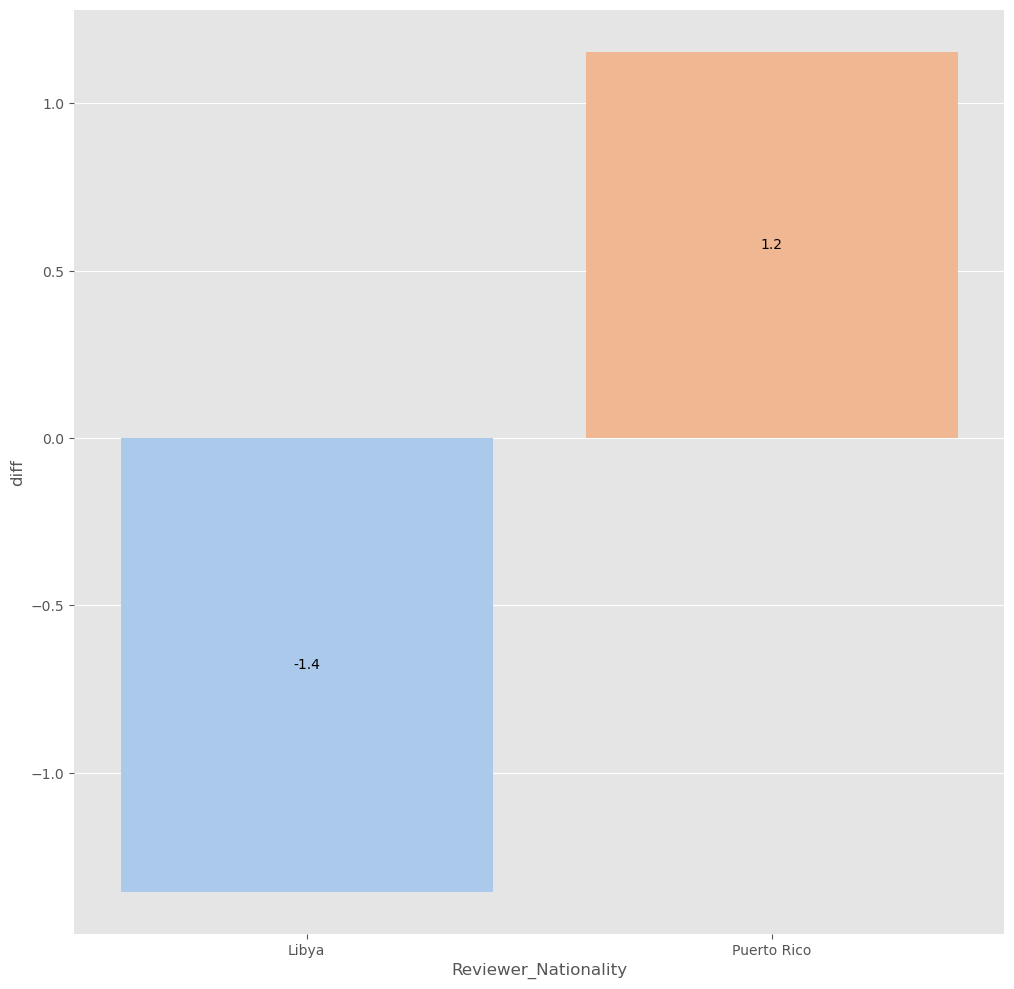

In [28]:
plt.figure(figsize=(12,12))
ax = sns.barplot(x=top2.index, y="diff", data=top2, estimator=sum, palette='pastel')
plt.bar_label(ax.containers[0],fmt='%.1f',label_type='center')
sns.despine(bottom = True, left = True)

## Mapping where hotel good yes very nice

In [29]:
reviews.groupby('Hotel_Name').mean()

,Id_Hotel_Rating,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
Hotel_Name,,,,,,,,,,
11 Cadogan Gardens,33783.0,101.0,8.7,15.528302,393.0,19.974843,7.226415,8.845283,51.493616,-0.159235
1K Hotel,43222.5,69.0,7.7,24.932432,663.0,15.601351,9.141892,7.861486,48.863932,2.365874
25hours Hotel beim MuseumsQuartier,370660.0,391.0,8.8,16.161103,4324.0,21.911466,8.722787,8.983309,48.206474,16.354630
41,185654.0,66.0,9.6,8.883495,244.0,25.300971,6.009709,9.711650,51.498147,-0.143649
45 Park Lane Dorchester Collection,191800.5,27.0,9.4,6.750000,68.0,11.535714,7.214286,9.603571,51.506371,-0.151536
...,...,...,...,...,...,...,...,...,...,...
citizenM London Bankside,96936.0,804.0,9.1,13.977587,3802.0,20.856295,9.768622,9.112261,51.505151,-0.100472
citizenM London Shoreditch,219640.5,500.0,9.1,14.439141,2113.0,21.620525,8.219570,9.092005,51.524137,-0.078698
citizenM Tower of London,181392.0,832.0,9.1,15.623292,4672.0,24.430778,9.334522,9.135591,51.510237,-0.076443


In [30]:
wwr = reviews.groupby('Hotel_Name')[['Country_Name','Average_Score','lat','lng']].agg(pd.Series.mode)
topwwr = wwr.loc[wwr['Average_Score'] >=9]
topwwr2 = pd.merge(topwwr.groupby('Country_Name').size().to_frame().reset_index(), cc, left_on='Country_Name', right_on='Reviewer_Nationality').drop(['Reviewer_Nationality','Alpha-2 code','Numeric code','ISO 3166-2'],axis=1)
topwwr3 = wwr.groupby('Country_Name').size().to_frame().reset_index().rename(columns={0:'antal'})
topwwrcc=pd.merge(topwwr3,topwwr2,on='Country_Name').rename(columns={0:'duktiga'})
topwwrcc['prolle'] = (topwwrcc['duktiga'].div(topwwrcc['antal']))*100
topwwrcc = topwwrcc.round({'prolle':2})


In [31]:
fig = go.Figure(data=go.Choropleth(
    locations = topwwrcc['Alpha-3 code'],
    z = topwwrcc['prolle'],
    text = topwwrcc['Country_Name'],
    autocolorscale=False,
    marker_line_color='darkgray',
    marker_line_width=1,
    colorscale=[(0,'Red'),(0.5,'Yellow'),(1,'green')],
    colorbar_title = 'Percentage'))
fig.update_layout(
    title_text='Percentage of Hotels with a score over 9.5',
    margin=dict(l=2, r=2, t=50, b=5),
    annotations= [dict(x=0.5,y=0.01,text="Source: <a href='https://www.kaggle.com/datasets/jiashenliu/515k-hotel-reviews-data-in-europe'> 515K Hotel Reviews Data in Europe (booking.com)",showarrow=False)],
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular' # 'orthographic' will make it globeeee
        ,scope='europe'
    ))

In [32]:
reviews['Country_Name'] = reviews['Country_Name'].str.strip()

In [33]:
parisdf = reviews.loc[reviews['Country_Name'] == 'France']

In [34]:
parisdf = parisdf.groupby('Hotel_Name')[['Average_Score','lat','lng']].mean()

In [35]:
parisdf.reset_index(inplace=True)

In [36]:
parisdf.drop(parisdf.loc[parisdf.isnull().any(axis=1)].index,axis=0,inplace=True)

In [37]:
topwwr

,Country_Name,Average_Score,lat,lng
Hotel_Name,,,,
41,United Kingdom,9.6,51.498147,-0.143649
45 Park Lane Dorchester Collection,United Kingdom,9.4,51.506371,-0.151536
Acad mie H tel Saint Germain,France,9.0,48.855263,2.33059
Alma Barcelona GL,Spain,9.2,41.394507,2.163266
Amba Hotel Charing Cross,United Kingdom,9.3,51.508236,-0.126196
...,...,...,...,...
Waldorf Astoria Amsterdam,Netherlands,9.5,52.364768,4.896945
art otel Amsterdam,Netherlands,9.0,52.377743,4.897057
citizenM London Bankside,United Kingdom,9.1,51.505151,-0.100472


## Most talkative Country 

In [38]:
pd.options.display.max_rows = 20
pd.options.display.min_rows = 15

In [39]:
temp = pd.DataFrame()

In [40]:
temp['pos'] = reviews.groupby('Reviewer_Nationality')['Review_Total_Positive_Word_Counts'].mean().loc[reviews.groupby('Reviewer_Nationality').size() > 3].to_frame()
temp['neg'] = reviews.groupby('Reviewer_Nationality')['Review_Total_Negative_Word_Counts'].mean().loc[reviews.groupby('Reviewer_Nationality').size() > 3].to_frame()
temp['mean'] = temp['pos'] + temp['neg']
temp.drop(['neg','pos'],axis=1,inplace=True)
temp.reset_index(inplace=True)


In [41]:
temp.drop(temp.index[temp['Reviewer_Nationality'] == ''],inplace=True)

In [42]:
temp2 = temp.merge(cc,on='Reviewer_Nationality')

In [43]:
temp2.drop(columns=['Alpha-2 code','Numeric code','ISO 3166-2'],inplace=True)

In [44]:
temp2 = temp2.round(decimals=0)

In [45]:
fig = go.Figure(data=go.Choropleth(
    locations = temp2['Alpha-3 code'],
    z = temp2['mean'],
    text = temp2['Reviewer_Nationality'],
    autocolorscale=False,
    marker_line_color='darkgray',
    marker_line_width=1,
    colorscale='RdYlGn',
    colorbar_title = 'Reviewscore'))
fig.update_layout(
    margin=dict(l=2, r=2, t=50, b=50),
    title_text='Average words per review by country',
    annotations= [dict(x=0.5,y=-0.1,text="Source: <a href='https://www.kaggle.com/datasets/jiashenliu/515k-hotel-reviews-data-in-europe'> 515K Hotel Reviews Data in Europe (booking.com)",showarrow=False)],
    geo=dict(
        showframe=False,
        showland=True,
        showcoastlines=False,
        projection_type='equirectangular' # 'orthographic' 
        
    ))
#fig.write_html('data/hej4')


In [46]:
testtest =reviews.groupby(['Reviewer_Nationality','Country_Name'])['Reviewer_Score'].mean().to_frame()

In [47]:
testtest.groupby(level=0).max()

,Reviewer_Score
Reviewer_Nationality,
,8.350725
Afghanistan,8.300000
Albania,8.376471
Algeria,8.633333
American Samoa,6.700000
Andorra,9.600000
Angola,8.900000
...,...
Vatican City,7.900000


In [48]:
testgb = testtest.groupby(level=0).idxmax(axis='index').merge(testtest.groupby(level=0).max(),on='Reviewer_Nationality')['Reviewer_Score_x'].to_frame()

In [49]:
testgb['Land'] = [y for x,y in list(testtest.groupby(level=0).idxmax(axis='index').merge(testtest.groupby(level=0).max(),on='Reviewer_Nationality')['Reviewer_Score_x'])]

In [50]:
testgb['Score'] = testtest.groupby(level=0).max()['Reviewer_Score']


In [51]:
testgb.drop(columns=('Reviewer_Score_x'),inplace=True)

In [52]:
testgb.reset_index(inplace=True)
testgb.drop(testgb.loc[testgb['Reviewer_Nationality'] == ''].index,axis=0,inplace=True)

In [53]:
test2 = testgb.merge(cc,on='Reviewer_Nationality')[['Reviewer_Nationality','Land','Score','Alpha-3 code']]

### -------

In [54]:
test3 = test2.groupby('Land').size().to_frame()

In [55]:
test3.reset_index(inplace=True)

In [56]:
test3.rename(columns={0:'size'},inplace=True)

In [57]:
fig9 = px.bar(temp2.sort_values(by='mean',ascending=False).head(5),x='Reviewer_Nationality',y='mean',color='Reviewer_Nationality',range_y=(30,50.9))

In [58]:
fig9

In [59]:
testtest12 =reviews.groupby('Reviewer_Nationality')['Reviewer_Score'].mean().sort_values().reset_index()

In [60]:


colors = {
    'background': '#ab8080',
    'text': '#000000'
}

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)


fig = go.Figure(data=go.Choropleth(
    locations = asn['Alpha-3 code'],
    z = asn['Reviewer_Score'],
    text = asn['Reviewer_Nationality'],
    autocolorscale=False,
    marker_line_color='darkgray',
    marker_line_width=1,
    colorscale='RdYlGn',
    colorbar_title = 'Reviewscore'))

fig2 = go.Figure(data=go.Choropleth(
    locations = topwwrcc['Alpha-3 code'],
    z = topwwrcc['prolle'],
    text = topwwrcc['Country_Name'],
    autocolorscale=False,
    marker_line_color='darkgray',
    marker_line_width=1,
    colorscale=[(0,'Red'),(0.5,'Yellow'),(1,'green')],
    colorbar_title = 'Percentage'))

fig3 = go.Figure(data=go.Choropleth(
    locations = temp2['Alpha-3 code'],
    z = temp2['mean'],
    text = temp2['Reviewer_Nationality'],
    autocolorscale=False,
    marker_line_color='darkgray',
    marker_line_width=1,
    colorscale='RdYlGn',
    colorbar_title = 'Reviewscore'))



fig5 = px.choropleth(test2, color="Land",
                    locations="Alpha-3 code",
                    projection="equirectangular", hover_data=["Reviewer_Nationality"],locationmode='ISO-3',title='Highest reviewed country by country',width=1200
                   )

fig6 = px.bar(test3, x='Land', y='size',
             hover_data=['size', 'Land'], color='Land',text_auto='size', height=800,color_discrete_map = {'United Kingdom': '#18d2f3', 'Spain': '#fea15a', 'France': '#ab63fa','Austria':'#01cc95','Italy':'#ef553c','Netherlands':'#636efa'}).update_xaxes(categoryorder='total descending')

fig7 = px.bar(asn.sort_values(by='Reviewer_Score',ascending=False).head(5), x='Reviewer_Nationality', y='Reviewer_Score',
             hover_data=['Reviewer_Score', 'Reviewer_Nationality'], color='Reviewer_Nationality', height=800,range_y=(9,9.36),title='Highest average score awarded by country',text_auto='Reviewer_Score',labels=dict(Reviewer_Nationality="Country", Reviewer_Score="Score")).update_xaxes(categoryorder='total descending')
            
fig8 = px.bar(asn.sort_values(by='Reviewer_Score',ascending=False).tail(5), x='Reviewer_Nationality', y='Reviewer_Score',
             hover_data=['Reviewer_Score', 'Reviewer_Nationality'], color='Reviewer_Nationality', height=800,range_y=(6,7.23),title='Lowest average score awarded by country',text_auto='Reviewer_Score',labels=dict(Reviewer_Nationality="Country", Reviewer_Score="Score")).update_xaxes(categoryorder='total ascending')            

fig9 = px.bar(temp2.sort_values(by='mean',ascending=False).head(5),x='Reviewer_Nationality',y='mean',color='Reviewer_Nationality',range_y=(30,50.9),hover_data=['mean','Reviewer_Nationality'],height=800,text_auto='mean',labels=dict(Reviewer_Nationality='Country',mean='Word Count'))

fig10 = px.bar(temp2.sort_values(by='mean',ascending=False).tail(5),x='Reviewer_Nationality',y='mean',color='Reviewer_Nationality',range_y=(0,16),hover_data=['mean','Reviewer_Nationality'],height=800,text_auto='mean',labels=dict(Reviewer_Nationality='Country',mean='Word Count')).update_xaxes(categoryorder='total ascending')

fig11 = px.bar(topwwrcc.sort_values(by='prolle',ascending=False),x='Country_Name',y='prolle',text_auto='prolle',color='Country_Name',range_y=(10,25),hover_data=['prolle','Country_Name'],labels=dict(Country_Name='Country',prolle='Percent'),height=800)




app.layout = html.Div(children=[
    html.Div([
        html.H1(children='Exploratory Analysis of booking.com reviews'),

        html.Div(children='''
        '''),

        dcc.Graph(
            id='graph1',
            figure=fig
        ),  
    html.Div([
        html.H1(children=''),

        html.Div(children='''
        '''),

        dcc.Graph(
            id='graph7',
            figure=fig7
        ),  
    html.Div([
        html.H1(children=''),

        html.Div(children='''
        '''),

        dcc.Graph(
            id='graph8',
            figure=fig8
        )  
    ]),
######
    #######

    html.Div([
        html.H1(children=''),

        html.Div(children='''
        '''),

        dcc.Graph(
            id='graph3',
            figure=fig3
        )]),  
    html.Div([
        html.H1(children=''),

        html.Div(children='''
        '''),

        dcc.Graph(
            id='graph9',
            figure=fig9
        )]),  
    html.Div([
        html.H1(children=''),

        html.Div(children='''
        '''),

        dcc.Graph(
            id='graph10',
            figure=fig10
        )]),  
    ]),  
    
    html.Div([
        html.H1(children=''),

        html.Div(children='''
            
        '''),

        dcc.Graph(
            id='graph5',
            figure=fig5
        )]),
        html.Div([
        html.H1(children=''),

        html.Div(children='''
            
        '''),

        dcc.Graph(
            id='graph6',
            figure=fig6)]),
    
     html.Div([
        html.H1(children=''),

        html.Div(children='''
            
        '''),

        dcc.Graph(
            id='graph2',
            figure=fig2
        )]),
        html.Div([
        
        html.H1(children=''),

        html.Div(children='''
        '''),

        dcc.Graph(
            id='graph11',
            figure=fig11
        )])])])
fig.update_layout(
    margin=dict(l=2, r=2, t=50, b=50),
    title_text='Average score awarded by country',
    annotations= [dict(x=0.5,y=-0.1,text="Source: <a href='https://www.kaggle.com/datasets/jiashenliu/515k-hotel-reviews-data-in-europe'> 515K Hotel Reviews Data in Europe (booking.com)",showarrow=False)],
    geo=dict(
        showframe=False,
        showland=True,
        showcoastlines=False,
        projection_type='equirectangular' # 'orthographic' will make it globeeee
        ),
    font=dict(
    family="Open Sans, verdana, arial, sans-serif",
    size=20,  # Set the font size here
    color="Black"))


fig2.update_layout(
    title_text='Percentage of Hotels with a score over 9',
    margin=dict(l=2, r=2, t=50, b=5),
    annotations= [dict(x=0.5,y=0.01,text="Source: <a href='https://www.kaggle.com/datasets/jiashenliu/515k-hotel-reviews-data-in-europe'> 515K Hotel Reviews Data in Europe (booking.com)",showarrow=False)],
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular' # 'orthographic' will make it globeeee
        ,scope='europe'),font=dict(
        family="Open Sans, verdana, arial, sans-serif",
        size=20,  # Set the font size here
        color="Black")),
fig3.update_layout(
    margin=dict(l=2, r=2, t=50, b=50),
    title_text='Average words per review by country',
    annotations= [dict(x=0.5,y=-0.1,text="Source: <a href='https://www.kaggle.com/datasets/jiashenliu/515k-hotel-reviews-data-in-europe'> 515K Hotel Reviews Data in Europe (booking.com)",showarrow=False)],
    geo=dict(
        showframe=False,
        showland=True,
        showcoastlines=False,
        projection_type='equirectangular'),font=dict(
        family="Open Sans, verdana, arial, sans-serif",
        size=20,  # Set the font size here
        color="Black")) # 'orthographic'
    
fig5.update_geos(fitbounds="locations", visible=False)
fig5.update_layout(margin={"r":10,"t":50,"l":10,"b":10},geo=dict(showland=True,showcoastlines=True),annotations=[dict(x=0.5,y=-0.04,text="Source: <a href='https://www.kaggle.com/datasets/jiashenliu/515k-hotel-reviews-data-in-europe'> 515K Hotel Reviews Data in Europe (booking.com)",showarrow=False)],font=dict(
        family="Open Sans, verdana, arial, sans-serif",
        size=20,  # Set the font size here
        color="Black"))

fig6.update_layout(
    font=dict(
        family="Open Sans, verdana, arial, sans-serif",
        size=20,  # Set the font size here
        color="Black"))

fig7.update_layout(
    font=dict(
        family="Open Sans, verdana, arial, sans-serif",
        size=20,  # Set the font size here
        color="Black"))
fig8.update_layout(
    font=dict(
        family="Open Sans, verdana, arial, sans-serif",
        size=20,  # Set the font size here
        color="Black"))
fig9.update_layout(
    font=dict(
        family="Open Sans, verdana, arial, sans-serif",
        size=20,  # Set the font size here
        color="Black"))

fig10.update_layout(
    font=dict(
        family="Open Sans, verdana, arial, sans-serif",
        size=20,  # Set the font size here
        color="Black"))
fig11.update_layout(
    font=dict(
        family="Open Sans, verdana, arial, sans-serif",
        size=20,  # Set the font size here
        color="Black"))


if __name__ == '__main__':
    app.run_server(debug=True,use_reloader=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
